In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import normalize
from sklearn import preprocessing
%matplotlib inline

In [10]:
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings

In [11]:
net = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/net.csv')
net.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


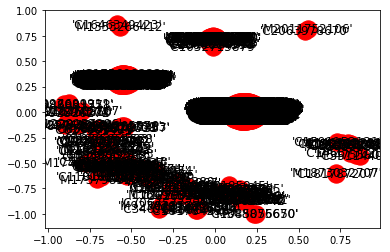

In [12]:
net = net[:1000]
G = nx.from_pandas_edgelist(net, source='Source', target='Target') 
nx.draw_networkx(G)

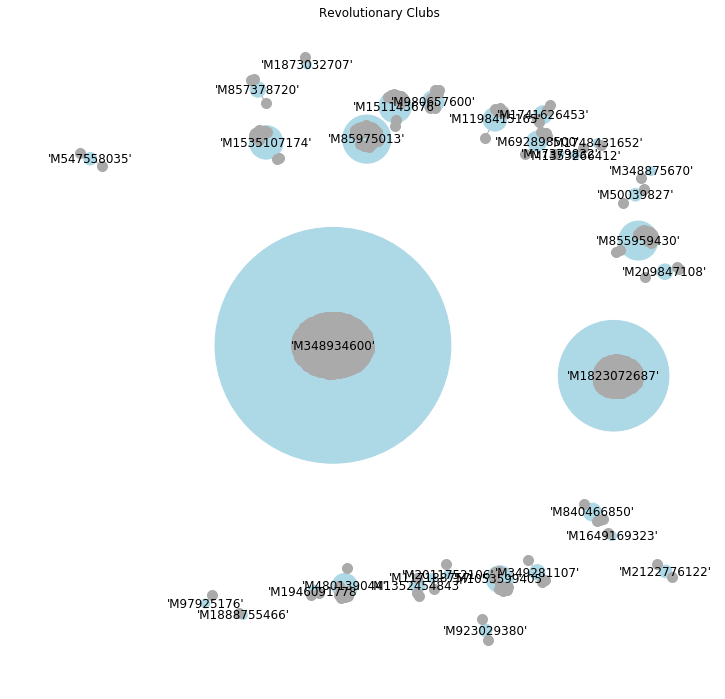

In [13]:
plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(net, source='Source', target='Target') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in net.Target.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in net.Target.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in net.Source.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in net.Source.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [6]:
df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/banksim.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [7]:
df.isnull().values.any()

False

In [8]:
list(set(Xfraud['age']))

NameError: name 'Xfraud' is not defined

In [ ]:
def fx(x):
    return str(x[1:-1])

def fx2(x):
    if x == "'U'":
        return 7
    else:
        return int(x[1:-1])


df['category'] = df.category.apply(fx)
df['gender'] = df.gender.apply(fx)
df['age'] = df.age.apply(fx2)

le = preprocessing.LabelEncoder()
le.fit(list(set(df['category'])))
df['category'] = le.transform(df['category'])

In [ ]:
list_categories = list(set(df['category']))
list_categories

In [ ]:
df.head()

In [ ]:
X = df
#X = df.loc[(df.category == 'es_sportsandtoys') | (df.category == 'es_fashion') | (df.category == 'es_travel') | (df.category == 'es_home') |(df.category == 'es_health') | (df.category == 'es_leisure') | df.category == 'es_tech') | (df.category == 'es_otherservices') | (df.category == 'es_barsandrestaurants') |(df.category == 'es_hyper') | (df.category == 'es_wellnessandbeauty')]
#Y = X['fraud']

X = X.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri', 'fraud'], axis = 1)


# Binary-encoding of labelled data in 'gender'
X.loc[X.gender == 'M', 'gender'] = 0
X.loc[X.gender == 'F', 'gender'] = 1
X.loc[X.gender == 'E', 'gender'] = 2
X.head()

In [ ]:
Xfraud = df.loc[(df.fraud == 1)]

In [ ]:
list_categories = list(set(X['category']))
list_ages = list(set(X['age']))

In [ ]:
for category in list_categories:
    x = X = df.loc[(df.category == category)]
    y = x['fraud']
    plt.subplots(figsize=(5,5))
    ax = sns.stripplot(y, x.amount, x.category, jitter= 0.45)

In [ ]:
for age in list_ageS:
    x = X = df.loc[(df.age == int(age))]
    y = x['fraud']
    plt.subplots(figsize=(5,5))
    ax = sns.stripplot(y, x.amount, x.age, jitter= 0.45)

In [ ]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.amount[:], X.category[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

In [ ]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.step[:], X.gender[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

In [ ]:
plt.subplots(figsize=(15,10))
ax = sns.stripplot(Y[:], X.step[:], X.age[:], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

In [1]:
x = 'step'
y = 'category'
z = 'amount'
Offset = 0.02

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')
#Offset +np.log10
ax.scatter((X.loc[Y == 0, x]), -(X.loc[Y == 0, y]), np.log10(X.loc[Y == 0, z]), c = 'g', marker = '.', s = 1, label = 'genuine')
    
ax.scatter((X.loc[Y == 1, x]) , -(X.loc[Y == 1, y]),np.log10(X.loc[Y == 1, z]), c = 'r', marker = '.', s = 1, label = 'fraudulent')

plt.axis('tight')


NameError: name 'sns' is not defined

In [ ]:
x = 'step'
y = 'age'
z = 'amount'
Offset = 0.02

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')
#Offset +np.log10
ax.scatter((X.loc[Y == 0, x]), -(X.loc[Y == 0, y]), np.log10(X.loc[Y == 0, z]), c = 'g', marker = '.', s = 1, label = 'genuine')
    
ax.scatter((X.loc[Y == 1, x]) , -(X.loc[Y == 1, y]),np.log10(X.loc[Y == 1, z]), c = 'r', marker = '.', s = 1, label = 'fraudulent')

plt.axis('tight')

In [ ]:
x = 'category'
y = 'age'
z = 'amount'
Offset = 0.02

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')
#Offset +np.log10
ax.scatter((X.loc[Y == 0, x]), -(X.loc[Y == 0, y]), np.log10(X.loc[Y == 0, z]), c = 'g', marker = '.', s = 1, label = 'genuine')
    
ax.scatter((X.loc[Y == 1, x]) , -(X.loc[Y == 1, y]),np.log10(X.loc[Y == 1, z]), c = 'r', marker = '.', s = 1, label = 'fraudulent')

plt.axis('tight')

In [ ]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]

f, ax = plt.subplots(figsize=(10, 8))

Xfraud = Xfraud.corr()

mask = np.zeros_like(Xfraud, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Xfraud, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)